# Opgave 3.1

Tag kolonnerne "area", "rooms" og "new price" from property-datasættet:

In [44]:
import pandas as pd
property_full = pd.read_csv("../input/property.csv")

In [27]:
property_full.head()

,Unnamed: 0,% difference,area,new price,old price,price difference,property area,rooms,type,zip code
0,0,-5 %,93 m²,6.500.000,6.200.000,-300.000,0 m²,2,Ejerlejlighed,1051 København K
1,1,-1 %,80 m²,4.150.000,4.100.000,-50.000,0 m²,2,Ejerlejlighed,1055 København K
2,2,-6 %,76 m²,4.800.000,4.495.000,-305.000,0 m²,3,Ejerlejlighed,1123 København K
3,3,-5 %,104 m²,6.650.000,6.295.000,-355.000,229 m²,3,Ejerlejlighed,1150 København K
4,4,-3 %,73 m²,3.350.000,3.250.000,-100.000,0 m²,2,Ejerlejlighed,1302 København K


In [28]:
columns_to_drop=['Unnamed: 0','% difference', 'old price', 'price difference', 'property area', 'type','zip code']

In [29]:
X = property_full.drop(columns=columns_to_drop)
X.head()

,area,new price,rooms
0,93 m²,6.500.000,2
1,80 m²,4.150.000,2
2,76 m²,4.800.000,3
3,104 m²,6.650.000,3
4,73 m²,3.350.000,2


Alternativ måde at importere på. Tager kun de kolonner fra csv-filen som der skal bruges:

In [55]:
columns_to_keep = ['area', 'new price', 'rooms']
X = pd.read_csv("../input/property.csv", usecols=columns_to_keep)
X.head()

,area,new price,rooms
0,93 m²,6.500.000,2
1,80 m²,4.150.000,2
2,76 m²,4.800.000,3
3,104 m²,6.650.000,3
4,73 m²,3.350.000,2


# Opgave 3.2
Sørg for at kolonnerne kun indeholder tal
- "area" indeholder "m²"
- tallene i "new price" indeholder punktummer

In [56]:
X['area'] = X['area'].str.replace(' m²','').astype('int64')
X['new price'] = X['new price'].str.replace('.','').astype('int64')
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   area       1092 non-null   int64
 1   new price  1092 non-null   int64
 2   rooms      1092 non-null   int64
dtypes: int64(3)
memory usage: 25.7 KB


,area,new price,rooms
0,93,6500000,2
1,80,4150000,2
2,76,4800000,3
3,104,6650000,3
4,73,3350000,2


# Opgave 3.3
Opdel datasættet med `train_test_split`, hvor y er "new price"

In [57]:
y = X['new price'].values
X = X.drop('new price', axis=1).values

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Opgave 3.4
Træn en LinearRegression algoritme på træningsdelen

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Opgave 3.5
Og predict på testdelen

In [60]:
property_predict = reg.predict(X_test)

# Opgave 3.6
Udregn en RMSE for din prediction

In [69]:
import numpy as np
from sklearn.metrics import  mean_squared_error
property_predict_rmse = np.sqrt(mean_squared_error(property_predict,y_test))
print(property_predict_rmse)

1793266.9092382684


# Opgave 3.7
Brug get_dummies på type-kolonnen, så tekstværdierne bliver til talværdier

In [37]:
X2 = property_full.drop(columns=['Unnamed: 0','% difference', 'old price', 'price difference', 'property area', 'zip code'])
X2.head()

,area,new price,rooms,type
0,93 m²,6.500.000,2,Ejerlejlighed
1,80 m²,4.150.000,2,Ejerlejlighed
2,76 m²,4.800.000,3,Ejerlejlighed
3,104 m²,6.650.000,3,Ejerlejlighed
4,73 m²,3.350.000,2,Ejerlejlighed


In [38]:
X2['area'] = X2['area'].str.replace(' m²','').astype('int64')
X2['new price'] = X2['new price'].str.replace('.','').astype('int64')

type_property = pd.get_dummies(X2, drop_first=True)

In [40]:
type_property.head()

,area,new price,rooms,type_ Ejerlejlighed,type_ Fritidsgrund,type_ Fritidshus,type_ Helårsgrund,type_ Landejendom,type_ Rækkehus,type_ Villa,type_ Villalejlighed
0,93,6500000,2,1,0,0,0,0,0,0,0
1,80,4150000,2,1,0,0,0,0,0,0,0
2,76,4800000,3,1,0,0,0,0,0,0,0
3,104,6650000,3,1,0,0,0,0,0,0,0
4,73,3350000,2,1,0,0,0,0,0,0,0


# Opgave 3.8
Gentræn din linearRegression, og tjek om scoren forbedrede sig

Først opdel:

In [64]:
ytype = type_property['new price'].values
Xtype = type_property.drop('new price', axis=1).values

Så train_test_split

In [65]:
Xtype_train, Xtype_test, ytype_train, ytype_test = train_test_split(Xtype,ytype,test_size=0.2,random_state=42)

så laves en fit på LinearRegression algoritmen og predict på test efterfølgende

In [66]:
reg.fit(Xtype_train,ytype_train)
property_predict_type = reg.predict(Xtype_test)

udregn RMSE på den nye prediction

In [70]:
property_predict_type_rmse = np.sqrt(mean_squared_error(property_predict_type,ytype_test))
print(property_predict_rmse,property_predict_type_rmse) 

1793266.9092382684 1601385.0252866277


# Opgave 3.9
`Forklar begrebet regularization`

Regularization bruges til at forhindre overfitting. 

Regularization "straffer" store koefficienter


- `Hvilke slags regularizations findes der?`
Ridge (regression) (L2) og Lasso (L1)

Lasso kan bruges til at vælge interessante festures i et datasæt, da den sænker coefficienten på mindre interessante features til nul

[  18575.14788556  118686.55846884 2994883.45217124 1517331.38866371
  706614.35390906 2237460.63877008  202904.85954809 1799657.87997644
  251272.0481353  2445467.03172254] [  10042.04877256  176468.4859329  1327612.51915617 -241107.95975695
 -510126.36081875  274679.51814223  -90945.65249793  507806.74935738
 -483742.71815848  955863.19407482]
      area  new price  rooms  type_ Ejerlejlighed  type_ Fritidsgrund  \
0       93    6500000      2                    1                   0   
1       80    4150000      2                    1                   0   
2       76    4800000      3                    1                   0   
3      104    6650000      3                    1                   0   
4       73    3350000      2                    1                   0   
...    ...        ...    ...                  ...                 ...   
1087   160    1595000      4                    0                   0   
1088   150    1595000      5                    0                   

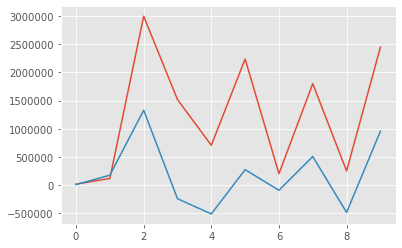

In [75]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso = Lasso(alpha=0.4, normalize=True)
ridge = Ridge(alpha=0.4, normalize=True)
lasso.fit(Xtype, ytype)
ridge.fit(Xtype, ytype)
lasso_coef = lasso.fit(Xtype,ytype).coef_
ridge_coef = ridge.fit(Xtype,ytype).coef_
print(lasso_coef, ridge_coef)
from matplotlib import pyplot as plt
plt.plot(lasso_coef)
plt.plot(ridge_coef)
plt.show()
print(type_property)